In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
chunksize = 100000
chunks = []
for chunk in pd.read_csv('data.csv', chunksize=chunksize):
    chunks.append(chunk)
data = pd.concat(chunks, ignore_index=True)

C:\Users\Vadim Prokofev\AppData\Local\Temp\ipykernel_20912\3421093659.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('data.csv', chunksize=chunksize):


In [16]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400,member,7.516667
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.961600,-87.666000,41.954200,-87.664400,member,3.716667
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.940100,-87.645500,41.940200,-87.653000,member,2.850000
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.884600,-87.631900,41.891800,-87.620600,member,8.816667
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.885600,-87.641800,41.889900,-87.634300,member,5.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25301942,33257926E3922CE9,electric_bike,2025-02-27 08:12:24.481,2025-02-27 08:22:33.314,Clinton St & Jackson Blvd,638,Elizabeth St & Fulton St,13197,41.878317,-87.640981,41.886827,-87.658937,member,10.147217
25301943,B75123316ADD8EB5,electric_bike,2025-02-10 15:39:59.903,2025-02-10 16:12:58.680,Wells St & Walton St,TA1306000011,Broadway & Berwyn Ave,13109,41.899930,-87.634430,41.978361,-87.659789,member,32.979617
25301944,4FF4A94BC06C01A8,electric_bike,2025-02-24 19:00:20.612,2025-02-24 19:03:58.429,Green St & Madison St,TA1307000120,Elizabeth St & Fulton St,13197,41.881859,-87.649264,41.886827,-87.658937,member,3.630283
25301945,7504C8A49CDCD31C,electric_bike,2025-02-05 05:44:35.151,2025-02-05 05:46:49.693,Wells St & Walton St,TA1306000011,LaSalle Dr & Huron St,KP1705001026,41.899930,-87.634430,41.894877,-87.632326,casual,2.242367


<Axes: >

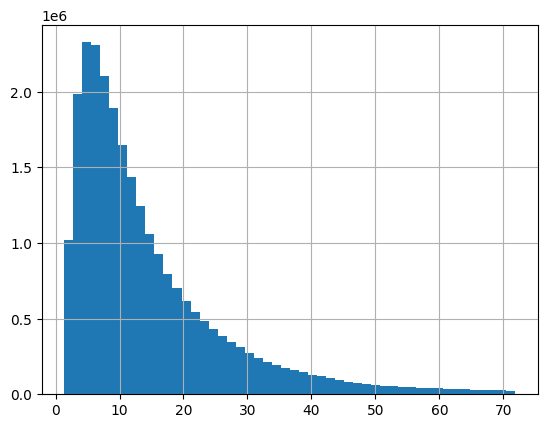

In [17]:
data['time'].hist(bins=50)

In [18]:
data['rideable_type'].unique()

array(['docked_bike', 'electric_bike', 'classic_bike', 'electric_scooter'],
      dtype=object)

<Axes: >

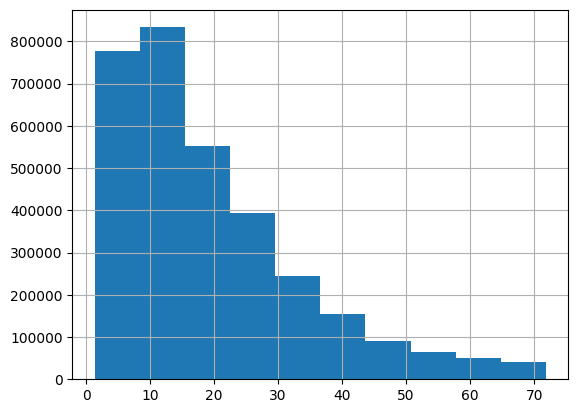

In [19]:
data[data['rideable_type'] == 'docked_bike']['time'].hist()

<Axes: >

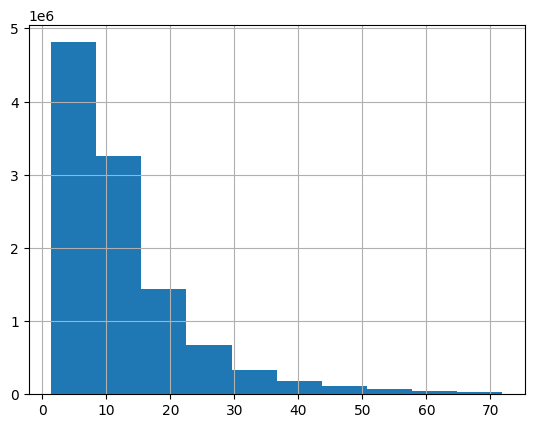

In [20]:
data[data['rideable_type'] == 'electric_bike']['time'].hist()

<Axes: >

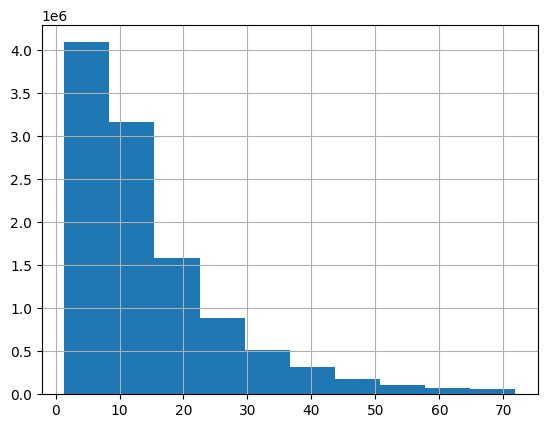

In [21]:
data[data['rideable_type'] == 'classic_bike']['time'].hist()

<Axes: >

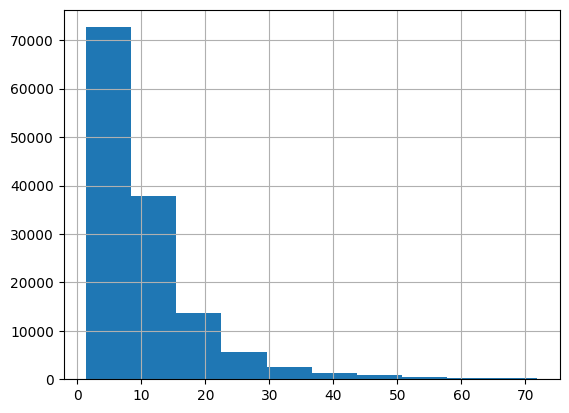

In [22]:
data[data['rideable_type'] == 'electric_scooter']['time'].hist()

In [23]:
data[data['rideable_type'] == 'docked_bike']['time'].mean()

np.float64(19.501824606229484)

In [24]:
data[data['rideable_type'] == 'docked_bike']['time'].median()

np.float64(15.383333333333333)

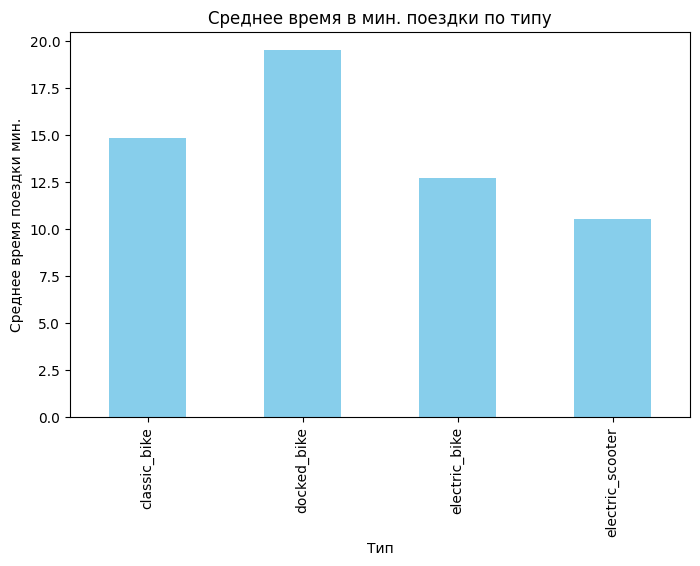

In [25]:
plt.figure(figsize=(8, 5))
data.groupby('rideable_type')['time'].mean().plot(kind='bar', color='skyblue')
plt.title('Среднее время в мин. поездки по типу')
plt.xlabel('Тип')
plt.ylabel('Среднее время поездки мин.')
plt.show()

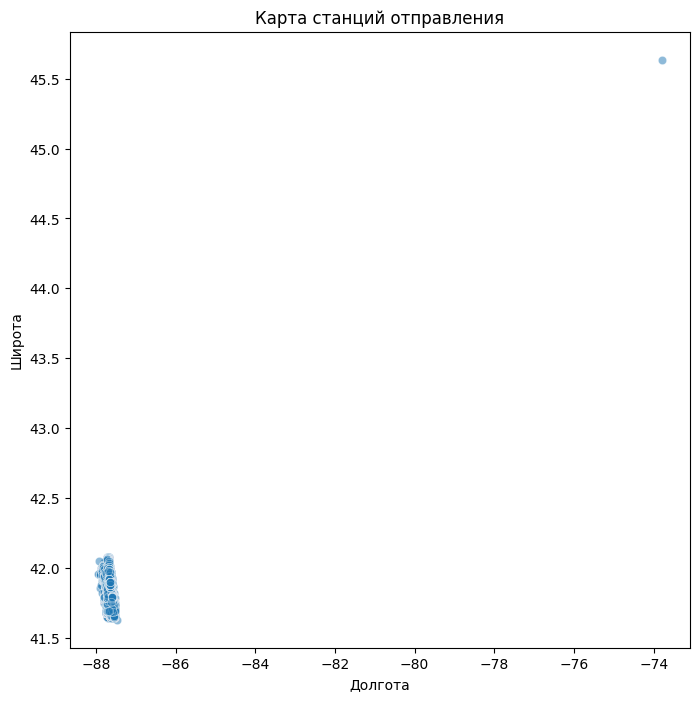

In [26]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=data, alpha=0.5)
plt.title('Карта станций отправления')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

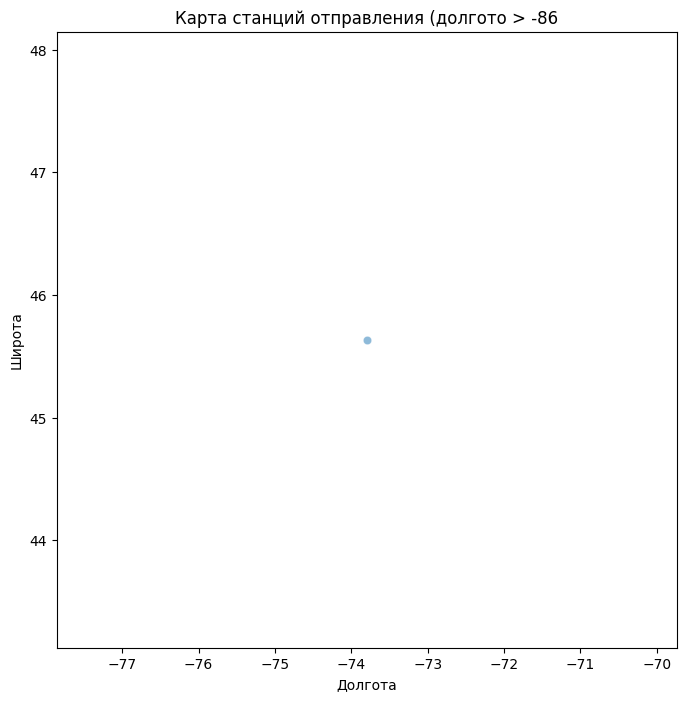

In [27]:
#Посмотрим на сомнительную точку, которая очень далеко от всех остальных
plt.figure(figsize=(8, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=data[data['start_lng'] > -86], alpha=0.5)
plt.title('Карта станций отправления (долгото > -86')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

In [28]:
data[data['start_lng'] > -86]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time
8613562,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,41.8646,-87.681,casual,2.583333


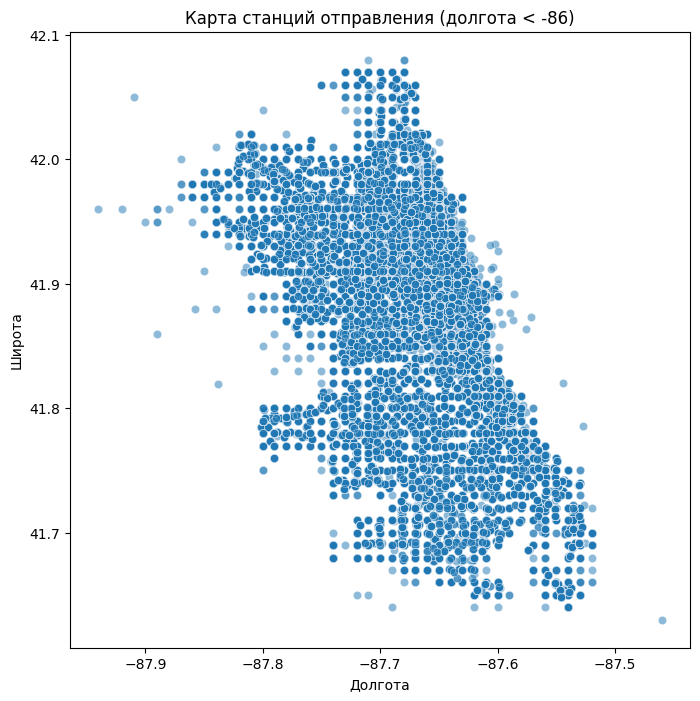

In [29]:
#Посмотрим на все остальные точки
plt.figure(figsize=(8, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=data[data['start_lng'] <= -86], alpha=0.5)
plt.title('Карта станций отправления (долгота < -86)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

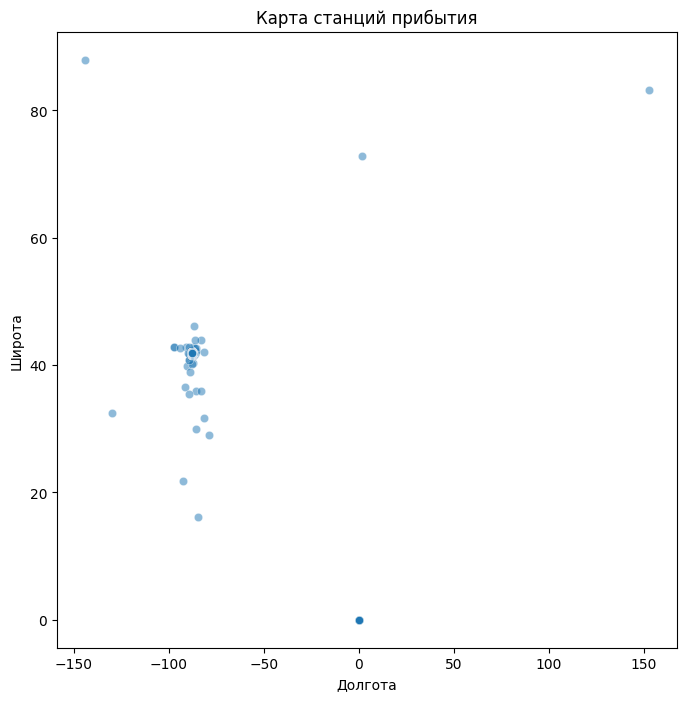

In [30]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='end_lng', y='end_lat', data=data, alpha=0.5)
plt.title('Карта станций прибытия')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

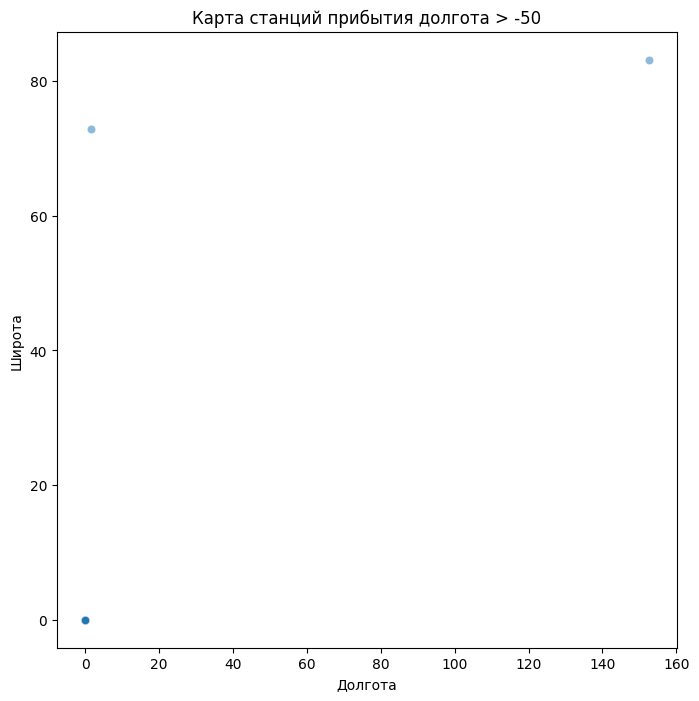

In [31]:
#Посмотрим на сомнительные точки справа
plt.figure(figsize=(8, 8))
sns.scatterplot(x='end_lng', y='end_lat', data=data[data['end_lng'] > -50], alpha=0.5)
plt.title('Карта станций прибытия долгота > -50')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

In [32]:
data[data['end_lng'] > -50]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time
13498847,3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.879434,-87.635504,0.00,0.00,member,5.583333
13517571,42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.854916,-87.663692,0.00,0.00,casual,20.433333
13522198,BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.879255,-87.639904,0.00,0.00,member,4.616667
13732485,6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.871737,-87.651030,0.00,0.00,casual,9.016667
13733558,E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.884114,-87.654264,0.00,0.00,member,4.383333
13733993,0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.878166,-87.631929,0.00,0.00,member,7.733333
13734064,7F49424E860E7094,classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,Green St & Washington Blvd,13053,Green St & Madison Ave*,chargingstx07,41.883181,-87.648725,0.00,0.00,member,1.400000
16044910,ADFF57D27B5BF9D2,classic_bike,2023-06-15 09:38:07,2023-06-15 09:42:57,State St & 54th St,646,OH Charging Stx - Test,OH Charging Stx - Test,41.796642,-87.625923,0.00,0.00,casual,4.833333
23752088,62DE8EEB7371193B,electric_bike,2024-09-04 18:54:23.501,2024-09-04 19:02:39.439,Clark St & Elm St,TA1307000039,NaN,NaN,41.902973,-87.631280,72.88,1.72,member,8.265633
24413543,F800C79DFF7E9180,electric_bike,2024-10-23 09:38:43.842,2024-10-23 09:52:54.363,Stetson Ave & South Water St,TA1308000029,NaN,NaN,41.886835,-87.622320,83.14,152.53,member,14.175350


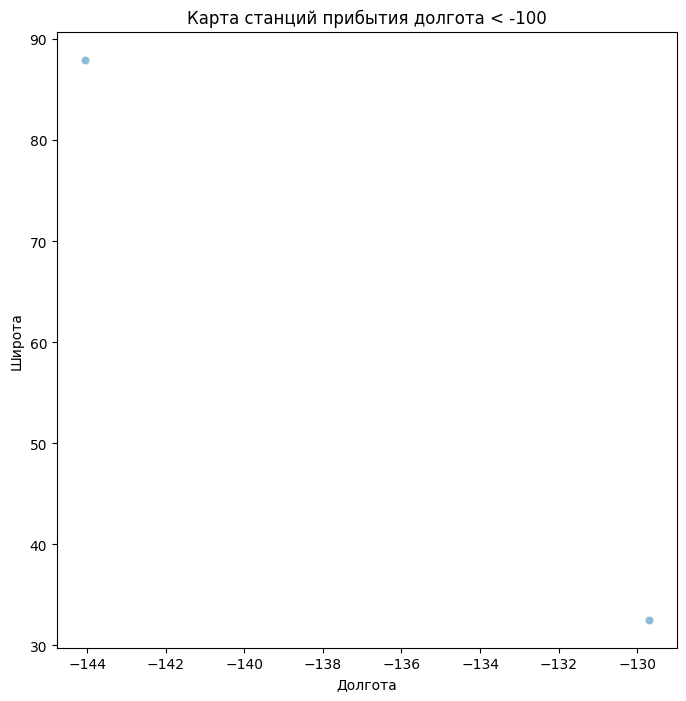

In [33]:
#Сомнительные точки слева
plt.figure(figsize=(8, 8))
sns.scatterplot(x='end_lng', y='end_lat', data=data[data['end_lng'] < -100], alpha=0.5)
plt.title('Карта станций прибытия долгота < -100')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

In [34]:
data[data['end_lng'] < -100]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time
21988732,BFB4AA1136202211,electric_bike,2024-07-27 17:17:18.671,2024-07-27 18:23:12.359,NaN,NaN,NaN,NaN,41.850000,-87.630000,87.96,-144.05,casual,65.894800
23164194,AC3B1B61AD56FB4D,electric_bike,2024-09-17 13:56:29.166,2024-09-17 14:10:34.910,Milwaukee Ave & Wabansia Ave,13243,NaN,NaN,41.912616,-87.681391,32.53,-129.71,casual,14.095733


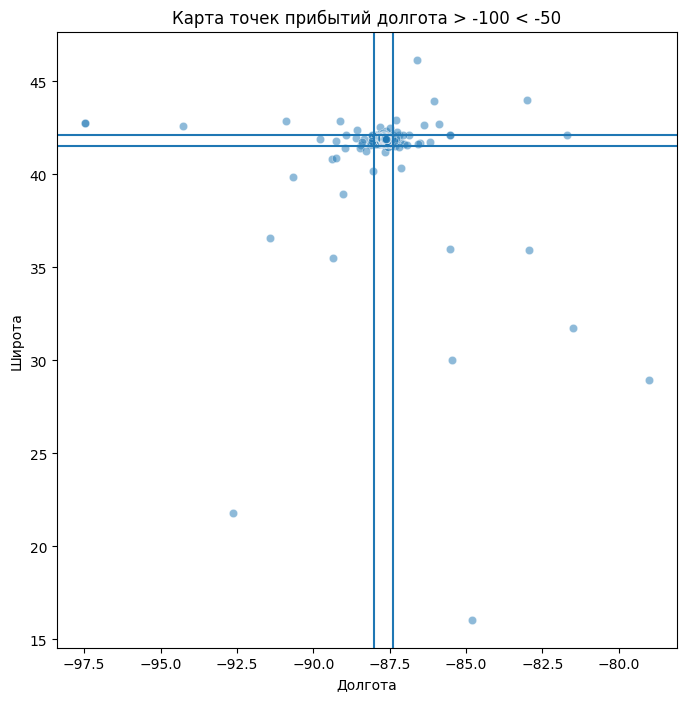

In [35]:
#Выделим все точки, которые попадают в зону стартовых точек
plt.figure(figsize=(8, 8))
sns.scatterplot(x='end_lng', y='end_lat', data=data[(data['end_lng'] >= -100) & (df['end_lng'] <= -50)], alpha=0.5)
plt.title('Карта точек прибытий долгота > -100 < -50')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.axhline(y=42.1)
plt.axhline(y=41.5)
plt.axvline(x=-87.4)
plt.axvline(x=-88)
plt.show()

In [36]:
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
time                  float64
dtype: object

In [30]:
data['started_at'] = pd.to_datetime(data['started_at'], format='mixed')

In [33]:
data_hour['hour_st'] = data['started_at'].dt.hour

In [34]:
data_hour

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time,hour_st
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59.000,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400,member,7.516667,20
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39.000,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.961600,-87.666000,41.954200,-87.664400,member,3.716667,14
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26.000,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.940100,-87.645500,41.940200,-87.653000,member,2.850000,19
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07.000,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.884600,-87.631900,41.891800,-87.620600,member,8.816667,16
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16.000,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.885600,-87.641800,41.889900,-87.634300,member,5.533333,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25301942,33257926E3922CE9,electric_bike,2025-02-27 08:12:24.481,2025-02-27 08:22:33.314,Clinton St & Jackson Blvd,638,Elizabeth St & Fulton St,13197,41.878317,-87.640981,41.886827,-87.658937,member,10.147217,8
25301943,B75123316ADD8EB5,electric_bike,2025-02-10 15:39:59.903,2025-02-10 16:12:58.680,Wells St & Walton St,TA1306000011,Broadway & Berwyn Ave,13109,41.899930,-87.634430,41.978361,-87.659789,member,32.979617,15
25301944,4FF4A94BC06C01A8,electric_bike,2025-02-24 19:00:20.612,2025-02-24 19:03:58.429,Green St & Madison St,TA1307000120,Elizabeth St & Fulton St,13197,41.881859,-87.649264,41.886827,-87.658937,member,3.630283,19
25301945,7504C8A49CDCD31C,electric_bike,2025-02-05 05:44:35.151,2025-02-05 05:46:49.693,Wells St & Walton St,TA1306000011,LaSalle Dr & Huron St,KP1705001026,41.899930,-87.634430,41.894877,-87.632326,casual,2.242367,5


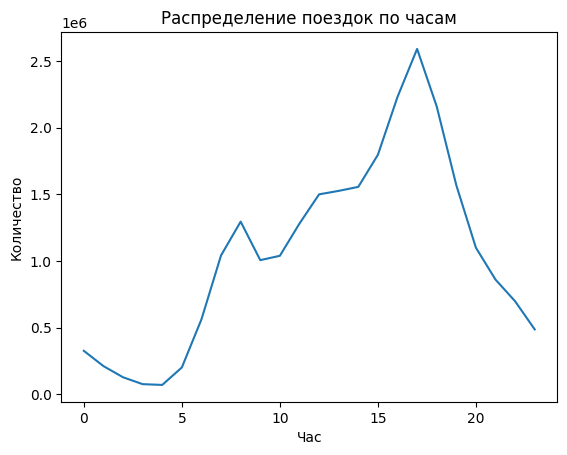

In [37]:
data_hour.groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

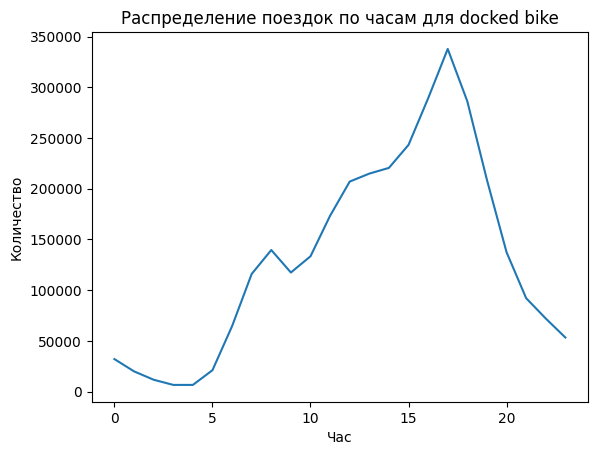

In [39]:
data_hour[data_hour['rideable_type'] == 'docked_bike'].groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам для docked bike')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

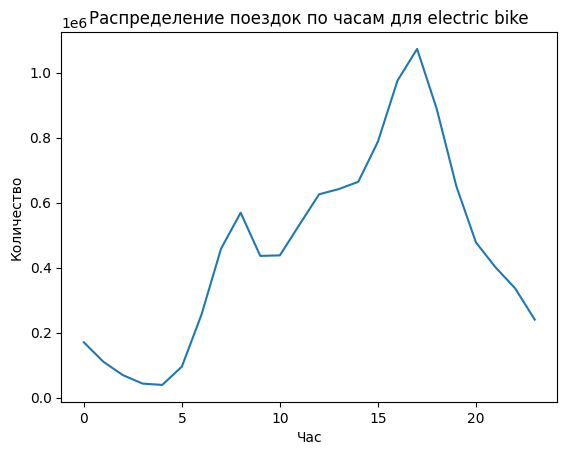

In [41]:
data_hour[data_hour['rideable_type'] == 'electric_bike'].groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам для electric bike')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

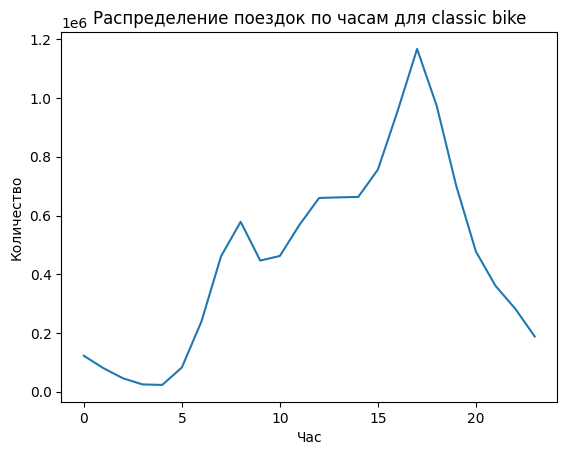

In [42]:
data_hour[data_hour['rideable_type'] == 'classic_bike'].groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам для classic bike')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

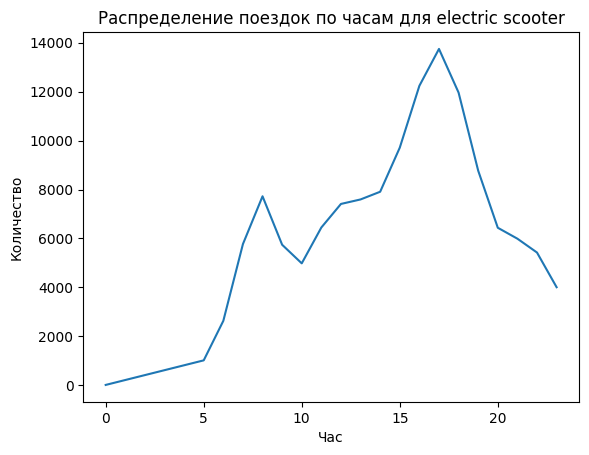

In [43]:
data_hour[data_hour['rideable_type'] == 'electric_scooter'].groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам для electric scooter')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

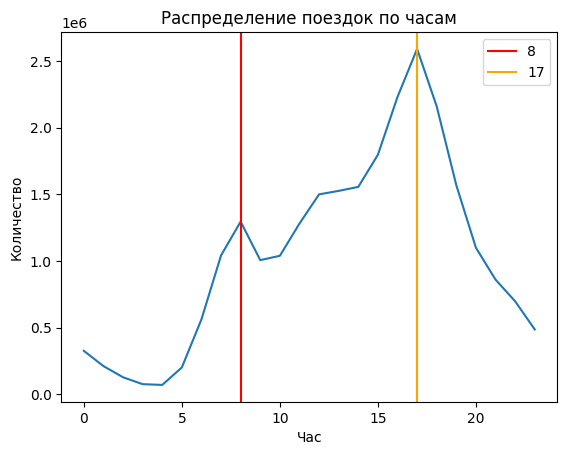

In [50]:
data_hour.groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.axvline(x=8, color='red', label='8')
plt.axvline(x=17, color='orange', label='17')
plt.legend()
plt.show()

In [51]:
data_month['month_st'] = data_hour['started_at'].dt.month

In [52]:
data_month

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time,hour_st,month_st
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59.000,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400,member,7.516667,20,1
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39.000,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.961600,-87.666000,41.954200,-87.664400,member,3.716667,14,1
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26.000,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.940100,-87.645500,41.940200,-87.653000,member,2.850000,19,1
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07.000,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.884600,-87.631900,41.891800,-87.620600,member,8.816667,16,1
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16.000,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.885600,-87.641800,41.889900,-87.634300,member,5.533333,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25301942,33257926E3922CE9,electric_bike,2025-02-27 08:12:24.481,2025-02-27 08:22:33.314,Clinton St & Jackson Blvd,638,Elizabeth St & Fulton St,13197,41.878317,-87.640981,41.886827,-87.658937,member,10.147217,8,2
25301943,B75123316ADD8EB5,electric_bike,2025-02-10 15:39:59.903,2025-02-10 16:12:58.680,Wells St & Walton St,TA1306000011,Broadway & Berwyn Ave,13109,41.899930,-87.634430,41.978361,-87.659789,member,32.979617,15,2
25301944,4FF4A94BC06C01A8,electric_bike,2025-02-24 19:00:20.612,2025-02-24 19:03:58.429,Green St & Madison St,TA1307000120,Elizabeth St & Fulton St,13197,41.881859,-87.649264,41.886827,-87.658937,member,3.630283,19,2
25301945,7504C8A49CDCD31C,electric_bike,2025-02-05 05:44:35.151,2025-02-05 05:46:49.693,Wells St & Walton St,TA1306000011,LaSalle Dr & Huron St,KP1705001026,41.899930,-87.634430,41.894877,-87.632326,casual,2.242367,5,2


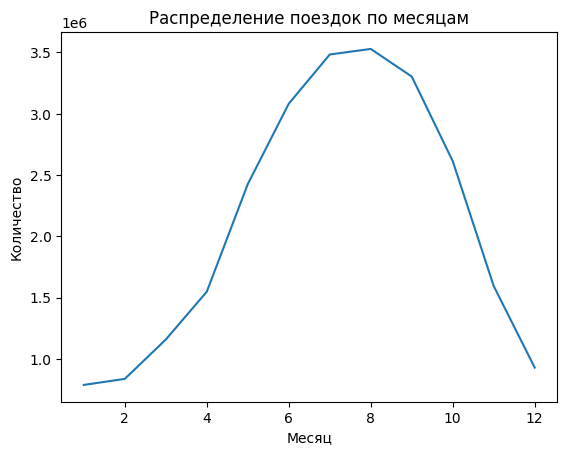

In [54]:
data_month.groupby('month_st').size().plot()
plt.title('Распределение поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

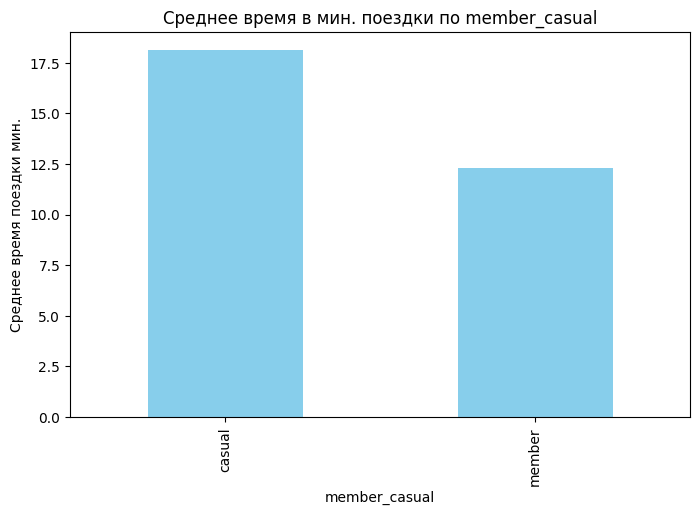

In [55]:
plt.figure(figsize=(8, 5))
data_month.groupby('member_casual')['time'].mean().plot(kind='bar', color='skyblue')
plt.title('Среднее время в мин. поездки по member_casual')
plt.xlabel('member_casual')
plt.ylabel('Среднее время поездки мин.')
plt.show()

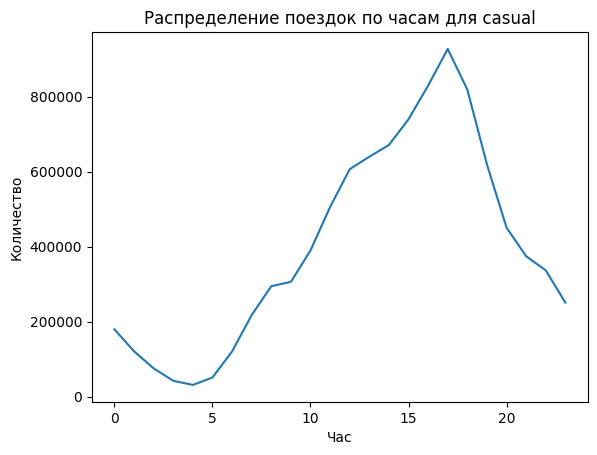

In [56]:
data_month[data_month['member_casual'] == 'casual'].groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам для casual')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

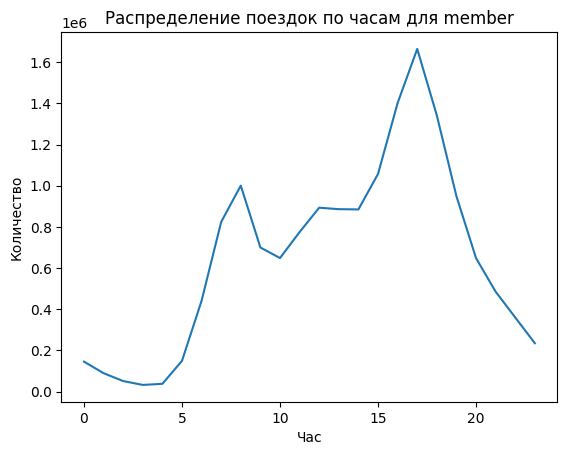

In [58]:
data_month[data_month['member_casual'] == 'member'].groupby('hour_st').size().plot()
plt.title('Распределение поездок по часам для member')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.show()

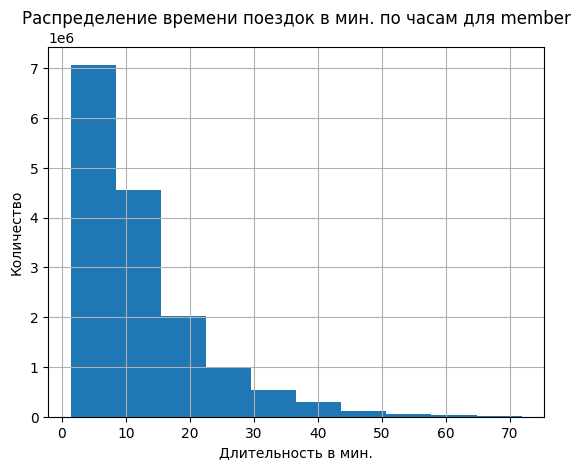

In [60]:
data_month[data_month['member_casual'] == 'member']['time'].hist()
plt.title('Распределение времени поездок в мин. по часам для member')
plt.xlabel('Длительность в мин.')
plt.ylabel('Количество')
plt.show()

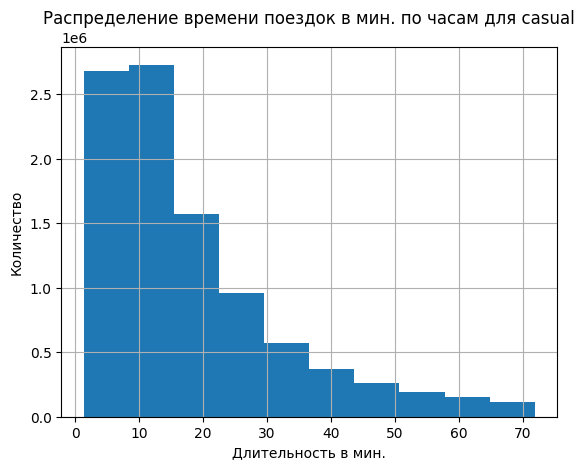

In [61]:
data_month[data_month['member_casual'] == 'casual']['time'].hist()
plt.title('Распределение времени поездок в мин. по часам для casual')
plt.xlabel('Длительность в мин.')
plt.ylabel('Количество')
plt.show()

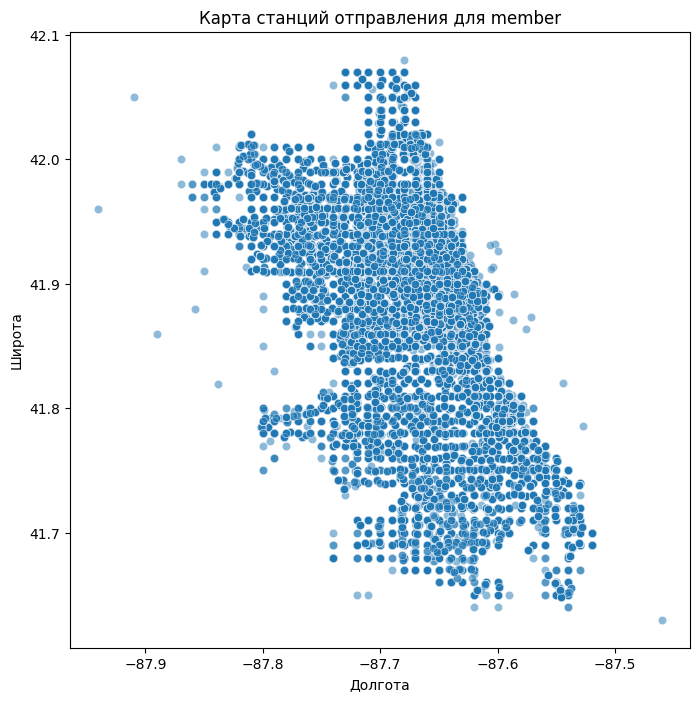

In [66]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=data_month[data_month['member_casual'] == 'member'], alpha=0.5)
plt.title('Карта станций отправления для member')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

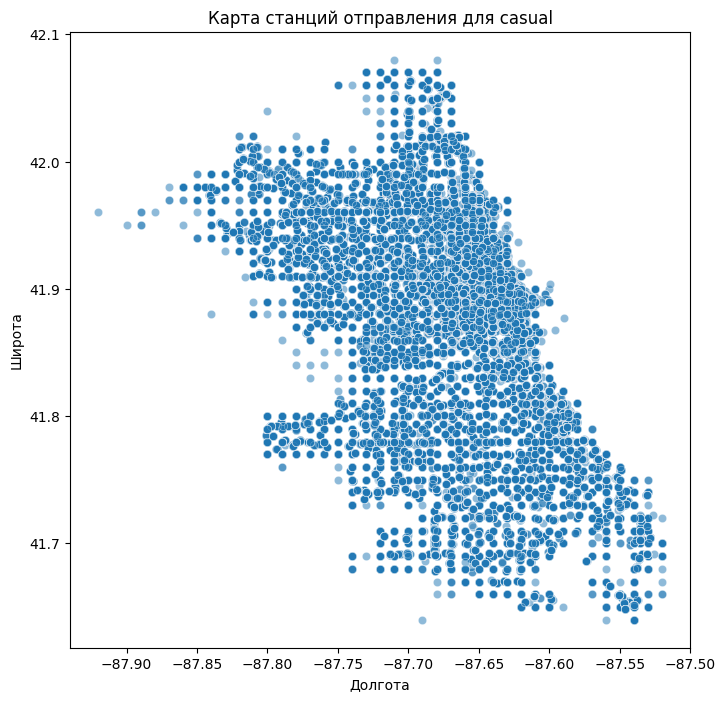

In [67]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=data_month[(data_month['member_casual'] == 'casual') & (data_month['start_lng'] < -80)], alpha=0.5)
plt.title('Карта станций отправления для casual')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

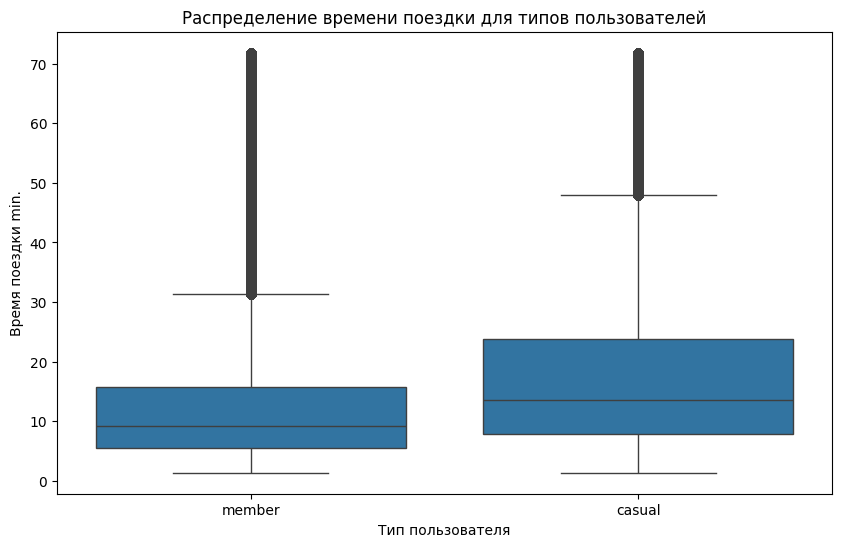

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_month, x='member_casual', y='time')
plt.title('Распределение времени поездки для типов пользователей')
plt.xlabel('Тип пользователя')
plt.ylabel('Время поездки min.')
plt.show()


In [69]:
data_loop['is_loop'] = data_month['start_station_id'] == data_month['end_station_id']

In [71]:
data_loop['is_loop'].sum() / len(data_loop)

np.float64(0.03797071426953823)

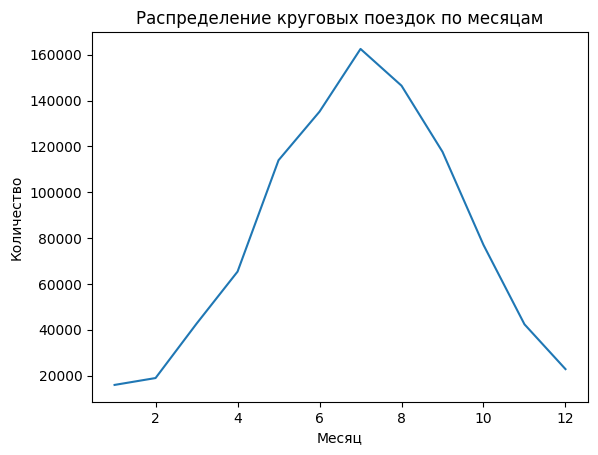

In [72]:
data_loop[data_loop['is_loop'] == 1].groupby('month_st').size().plot()
plt.title('Распределение круговых поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

In [73]:
data_loop

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time,hour_st,month_st,is_loop
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59.000,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400,member,7.516667,20,1,False
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39.000,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.961600,-87.666000,41.954200,-87.664400,member,3.716667,14,1,False
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26.000,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.940100,-87.645500,41.940200,-87.653000,member,2.850000,19,1,False
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07.000,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.884600,-87.631900,41.891800,-87.620600,member,8.816667,16,1,False
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16.000,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.885600,-87.641800,41.889900,-87.634300,member,5.533333,8,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25301942,33257926E3922CE9,electric_bike,2025-02-27 08:12:24.481,2025-02-27 08:22:33.314,Clinton St & Jackson Blvd,638,Elizabeth St & Fulton St,13197,41.878317,-87.640981,41.886827,-87.658937,member,10.147217,8,2,False
25301943,B75123316ADD8EB5,electric_bike,2025-02-10 15:39:59.903,2025-02-10 16:12:58.680,Wells St & Walton St,TA1306000011,Broadway & Berwyn Ave,13109,41.899930,-87.634430,41.978361,-87.659789,member,32.979617,15,2,False
25301944,4FF4A94BC06C01A8,electric_bike,2025-02-24 19:00:20.612,2025-02-24 19:03:58.429,Green St & Madison St,TA1307000120,Elizabeth St & Fulton St,13197,41.881859,-87.649264,41.886827,-87.658937,member,3.630283,19,2,False
25301945,7504C8A49CDCD31C,electric_bike,2025-02-05 05:44:35.151,2025-02-05 05:46:49.693,Wells St & Walton St,TA1306000011,LaSalle Dr & Huron St,KP1705001026,41.899930,-87.634430,41.894877,-87.632326,casual,2.242367,5,2,False


In [74]:
data_loop.groupby('rideable_type').size()

rideable_type
classic_bike        10980912
docked_bike          3203029
electric_bike       10982444
electric_scooter      135562
dtype: int64

In [75]:
data_loop.groupby('member_casual').size()

member_casual
casual     9601972
member    15699975
dtype: int64

In [4]:
df_el_sc = data_loop[data_loop['rideable_type'] == 'electric_scooter']

In [5]:
df_el_sc

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time
23147692,89571F1ECB5F7D20,electric_scooter,2024-09-18 17:05:54.227,2024-09-18 17:18:36.784,NaN,NaN,NaN,NaN,41.890000,-87.660000,41.89,-87.63,member,12.709283
23147693,D72AD246DF274D98,electric_scooter,2024-09-18 12:42:09.349,2024-09-18 12:47:13.067,NaN,NaN,NaN,NaN,41.900000,-87.680000,41.90,-87.67,member,5.061967
23147694,3D86E17A546214EA,electric_scooter,2024-09-18 13:53:59.713,2024-09-18 14:00:52.746,NaN,NaN,NaN,NaN,41.980000,-87.660000,41.99,-87.66,member,6.883883
23147695,B984E7B6A9D81F89,electric_scooter,2024-09-18 16:15:55.485,2024-09-18 16:27:26.996,NaN,NaN,NaN,NaN,41.820000,-87.620000,41.83,-87.62,member,11.525183
23147696,0C778ADF49AF886F,electric_scooter,2024-09-18 17:17:36.026,2024-09-18 17:40:34.459,NaN,NaN,NaN,NaN,41.880000,-87.640000,41.89,-87.63,member,22.973883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23930315,0B461D22E285A46B,electric_scooter,2024-09-04 17:29:34.064,2024-09-04 17:41:46.006,Larrabee St & Division St,KA1504000079,NaN,NaN,41.903486,-87.643353,41.89,-87.62,member,12.199033
23930321,6407A9F7D2FC7007,electric_scooter,2024-09-11 05:09:29.207,2024-09-11 05:29:37.151,Sheridan Rd & Greenleaf Ave,KA1504000159,NaN,NaN,42.010587,-87.662412,42.00,-87.66,member,20.132400
23930331,81B32D1B693FABB8,electric_scooter,2024-09-10 17:39:44.590,2024-09-10 18:13:03.230,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892278,-87.612043,41.89,-87.62,casual,33.310667
23930332,EB44AA90181E9E8F,electric_scooter,2024-09-02 11:46:31.860,2024-09-02 11:48:51.460,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892278,-87.612043,41.89,-87.61,member,2.326667


In [6]:
df_el_sc['start_station_name'].isna().sum()

np.int64(62991)

In [7]:
df_el_sc['end_station_name'].isna().sum()

np.int64(63409)

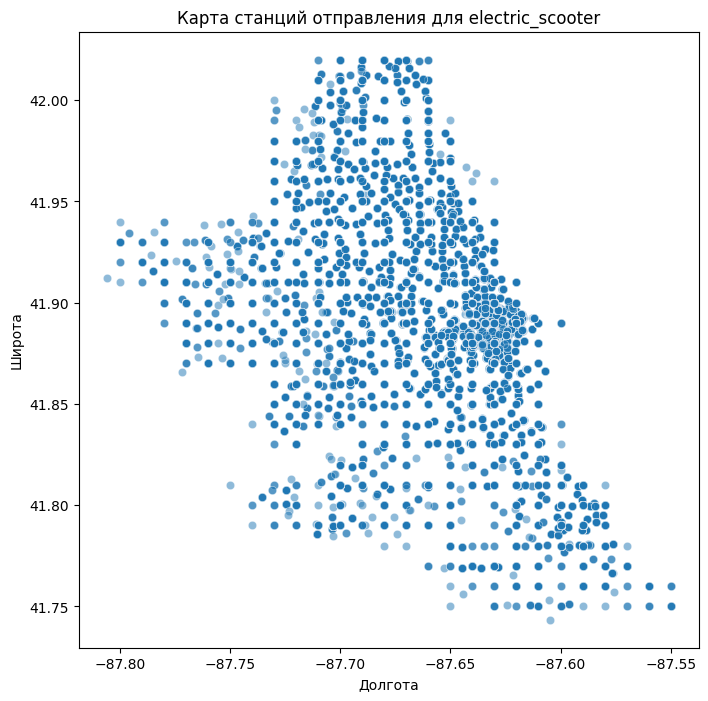

In [9]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=data[data['rideable_type'] == 'electric_scooter'], alpha=0.5)
plt.title('Карта станций отправления для electric_scooter')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

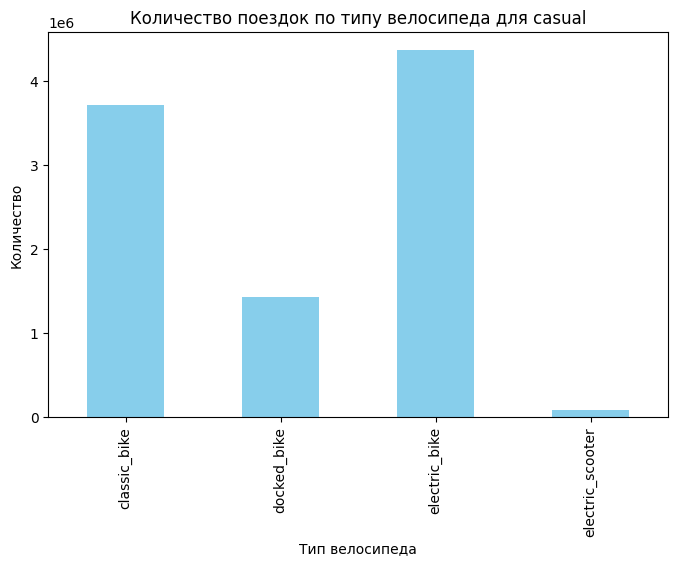

In [12]:
plt.figure(figsize=(8, 5))
data[data['member_casual'] == 'casual'].groupby('rideable_type').size().plot(kind='bar', color='skyblue')
plt.title('Количество поездок по типу велосипеда для casual')
plt.xlabel('Тип велосипеда')
plt.ylabel('Количество')
plt.show()

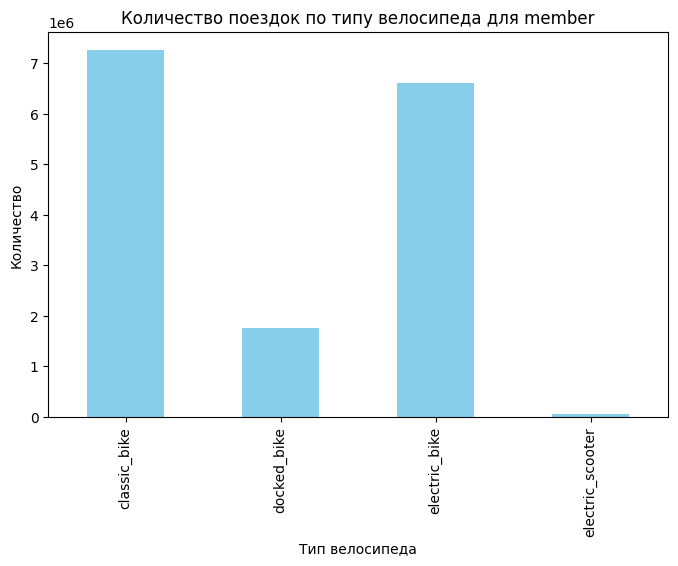

In [11]:
plt.figure(figsize=(8, 5))
data[data['member_casual'] == 'member'].groupby('rideable_type').size().plot(kind='bar', color='skyblue')
plt.title('Количество поездок по типу велосипеда для member')
plt.xlabel('Тип велосипеда')
plt.ylabel('Количество')
plt.show()